Using TensorFlow backend.


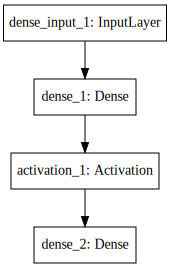

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot
import matplotlib.pyplot as plt
import numpy as np
import math
    
# model setup
model = Sequential()
model.add(Dense(160, input_dim = 2))
model.add(Activation('sigmoid'))
model.add(Dense(1))

# visualize the network structure
SVG(model_to_dot(model).create(prog='dot', format='svg'))

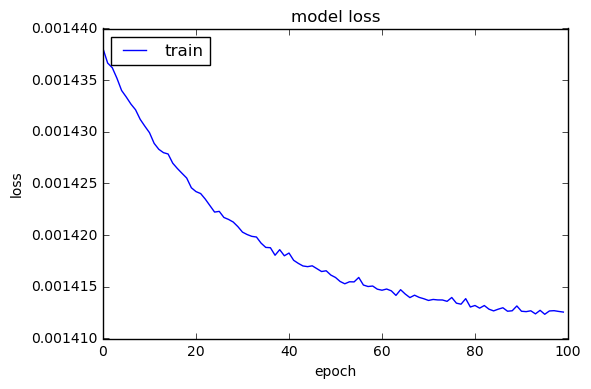

In [5]:
# specify data and train
data_size = 100000

X = (np.random.ranf((data_size, 2)) * 2 - 1) / math.pi 
y = np.zeros((data_size, 1))

for i in xrange(data_size):
    # linear function
    #y[i] = 2 * X[i, 0] - 1 * X[i, 1]
    # nonlinear function
    y[i] = 0.5 * math.pi * (X[i, 0] ** 2) * math.sin(2 * math.pi * X[i, 1])
     
model.compile(optimizer='sgd', loss='mse')
history = model.fit(X, y, batch_size=1000, nb_epoch=100, verbose=0)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [6]:
# test how well the model is doing
x_test = X[:10]
y_test = y[:10]
#x_test = np.ones((1, 2)) * 2
#y_test = 2
predictions = model.predict(x_test)
print 'predicted y:'
print predictions
print 'real y:'
print y_test

predicted y:
[[-0.01781622]
 [ 0.01559114]
 [ 0.04360267]
 [ 0.06217702]
 [-0.06567369]
 [ 0.03871559]
 [ 0.02135792]
 [-0.00025166]
 [ 0.04781332]
 [-0.04611338]]
real y:
[[-0.00080268]
 [ 0.02055447]
 [ 0.00015829]
 [ 0.01300549]
 [-0.13677928]
 [ 0.06610498]
 [ 0.06121055]
 [-0.00356814]
 [ 0.00684423]
 [-0.00042952]]


In [7]:
# you can see some summaries of the model if you like
model.summary()

model.get_config()

#model.get_weights()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 160)           480         dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 160)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             161         activation_1[0][0]               
Total params: 641
____________________________________________________________________________________________________


[{'class_name': 'Dense',
  'config': {'W_constraint': None,
   'W_regularizer': None,
   'activation': 'linear',
   'activity_regularizer': None,
   'b_constraint': None,
   'b_regularizer': None,
   'batch_input_shape': (None, 2),
   'bias': True,
   'init': 'glorot_uniform',
   'input_dim': 2,
   'input_dtype': 'float32',
   'name': 'dense_1',
   'output_dim': 160,
   'trainable': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'sigmoid',
   'name': 'activation_1',
   'trainable': True}},
 {'class_name': 'Dense',
  'config': {'W_constraint': None,
   'W_regularizer': None,
   'activation': 'linear',
   'activity_regularizer': None,
   'b_constraint': None,
   'b_regularizer': None,
   'bias': True,
   'init': 'glorot_uniform',
   'input_dim': None,
   'name': 'dense_2',
   'output_dim': 1,
   'trainable': True}}]